Abdul Saboor
20L-1113
BDS-4A

In [38]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Task 1 starts here

In [39]:
# Part A

data=pd.DataFrame(pd.read_csv("CD.csv")) # reading data from file

data.describe() # performing a rough analysis

# removing duplicates from data
print(data.isna().sum())
data=data.drop('CustomerID',axis=1)
data.drop_duplicates(keep=False,inplace=True)

# replacing missing data values with mean of column values
data["Age"]=data["Age"].replace(np.nan,data["Age"].mean())
data["Annual Income (k$)"]=data["Annual Income (k$)"].replace(np.nan,data["Annual Income (k$)"].mean())
data["Spending Score (1-100)"]=data["Spending Score (1-100)"].replace(np.nan,data["Spending Score (1-100)"].mean())

# dropping unnecesssary features from data
data=data.replace({"Male":0,"Female":1})
print(data)

CustomerID                144
Gender                      0
Age                         2
Annual Income (k$)         94
Spending Score (1-100)     10
dtype: int64
    Gender   Age  Annual Income (k$)  Spending Score (1-100)
0        0  18.0                33.0                    92.0
1        0  18.0                48.0                    59.0
2        0  18.0                59.0                    41.0
3        1  18.0                65.0                    48.0
4        0  19.0                15.0                    39.0
..     ...   ...                 ...                     ...
238      0  36.0                87.0                    92.0
239      1  36.0               103.0                    85.0
240      0  37.0                20.0                    13.0
241      0  37.0                78.0                     1.0
242      1  37.0                97.0                    32.0

[147 rows x 4 columns]


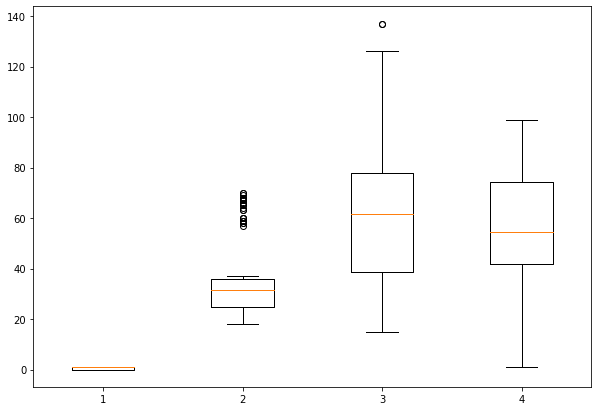

In [40]:
# Part B
fig = plt.figure(figsize =(10, 7))

data1=data
data1=data1[data1.Gender != 'kid']

# Creating plot
plt.boxplot(data1);

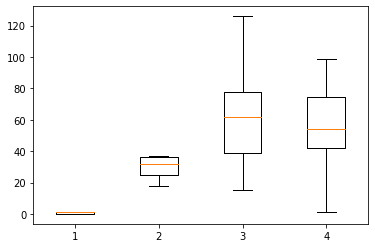

In [41]:
# without outliers
plt.boxplot(data1,showfliers=False);

Task 2 starts here

/var/folders/fn/bmfm8xkx7hgc1wc_rgq8_gyw0000gn/T/ipykernel_38308/2003354241.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data1 = data1[~((data1 < (Q1 - 1.5 * IQR)) |(data1 > (Q3 + 1.5 * IQR))).any(axis=1)]


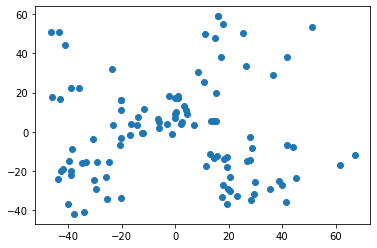

In [42]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA 
from sklearn.datasets import load_iris
from scipy import stats


# removing outliers
Q1=data1.quantile(0.25)
Q3=data1.quantile(0.75)
IQR=Q3-Q1
data1 = data1[~((data1 < (Q1 - 1.5 * IQR)) |(data1 > (Q3 + 1.5 * IQR))).any(axis=1)]

pca = PCA(n_components=2)
components = pca.fit_transform(data1)
c1 = components[:,0]
c2 = components[:,1]

# visualizing using scatterplot
plt.scatter(c1,c2);


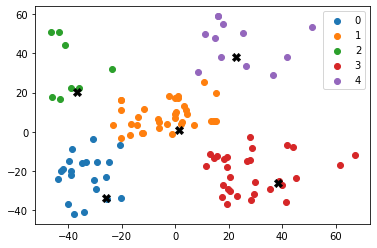

In [43]:
# implementing k-means algorithm
data=data1
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

means = KMeans(5)
label = means.fit_predict(data)
u_labels = np.unique(label)
 
centroids = means.cluster_centers_
pca2 = PCA(n_components= 2)
components = pca2.fit_transform(centroids)
cen1 = components[:,0]
cen2 = components[:,1]

for i in u_labels:
    plt.scatter(c1[label == i] , c2[label == i] , label = i)

plt.scatter(cen1,cen2, c='black', s= 70, marker='X', linewidths= .5)
plt.legend()
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 107 samples in 0.001s...
[t-SNE] Computed neighbors for 107 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 107 / 107
[t-SNE] Mean sigma: 18.880141
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.866676
[t-SNE] KL divergence after 1000 iterations: 0.089394


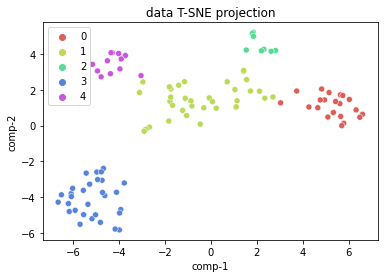

In [44]:
# implementing TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(data)

df = pd.DataFrame()
df["y"] = label
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df).set(title="data T-SNE projection");

Text(0, 0.5, 'WCSS')

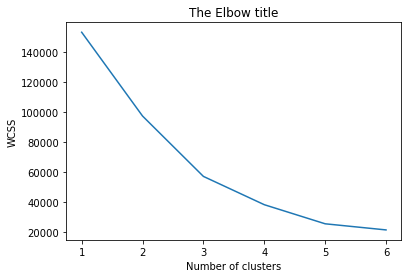

In [45]:
# Implementing elbow curve
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(data)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

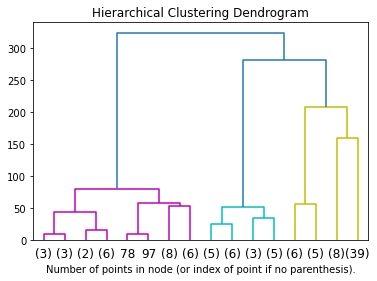

In [53]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


X = data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()